# 線形フィルタ処理いろいろ


In [ ]:
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/sample.jpg
!pip install japanize-matplotlib

--2021-05-28 23:51:39--  https://github.com/eiichiromomma/CVMLAB/raw/master/img/sample.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/sample.jpg [following]
--2021-05-28 23:51:40--  https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/sample.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78522 (77K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  76.68K  --.-KB/s    in 0.002s  

2021-05-28 23:51:40 (37.7 MB/s) - ‘sample.jpg’ saved [78522/78522]

     |████████████████████████████████| 4.1MB 27.9MB/s 
  C


## 平均値フィルタ

blurとboxFilterがある。例として15x15のフィルタをかける。どちらも正規化されるが，boxFilterはnormalizeオプションで正規化無しにできるのが違い

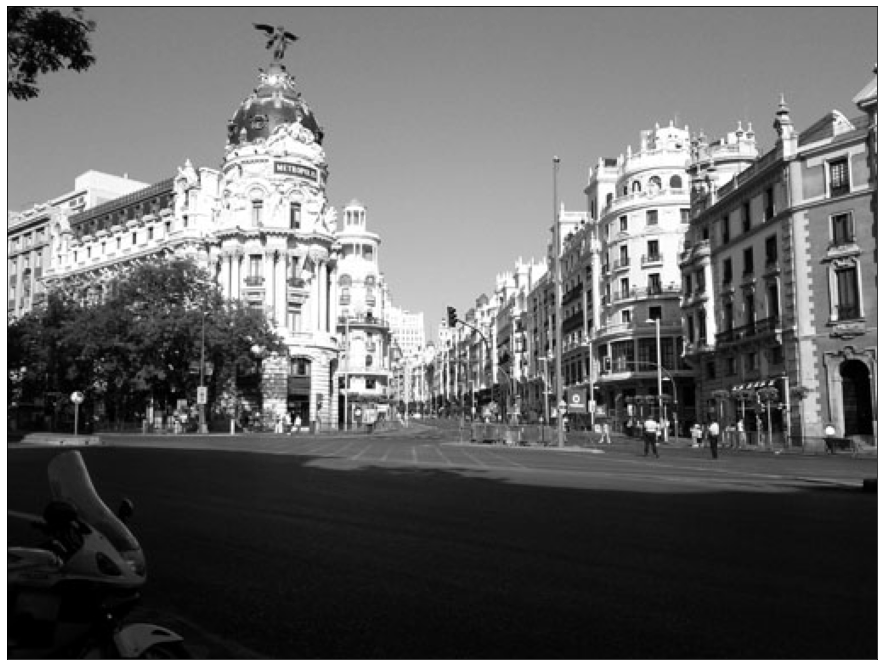

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import japanize_matplotlib
gimg = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
plt.rc('xtick', bottom=False, labelbottom=False)
plt.rc('ytick', left = False, labelleft = False)
plt.rc('figure', figsize=[24,12])
plt.imshow(gimg, cmap='gray')

両者の差分= 0


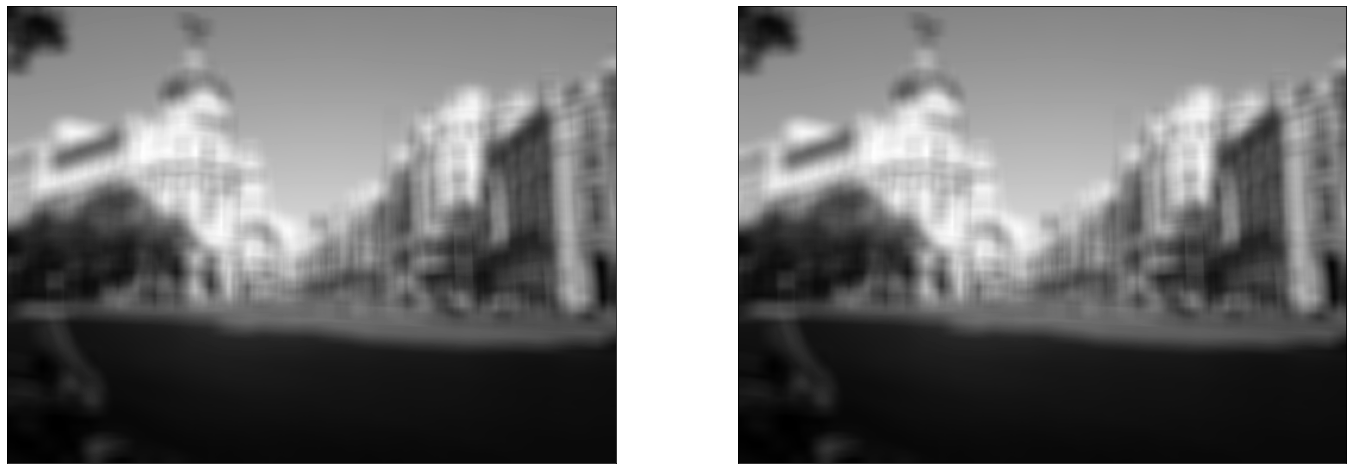

In [ ]:

dst1 = cv2.blur(gimg, (15,15))
dst2 = cv2.boxFilter(gimg, -1, (15,15))
print('両者の差分=', (dst1-dst2).sum())
plt.subplot(1,2,1)
plt.imshow(dst1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dst2, cmap='gray')

両者の差分= 19551306


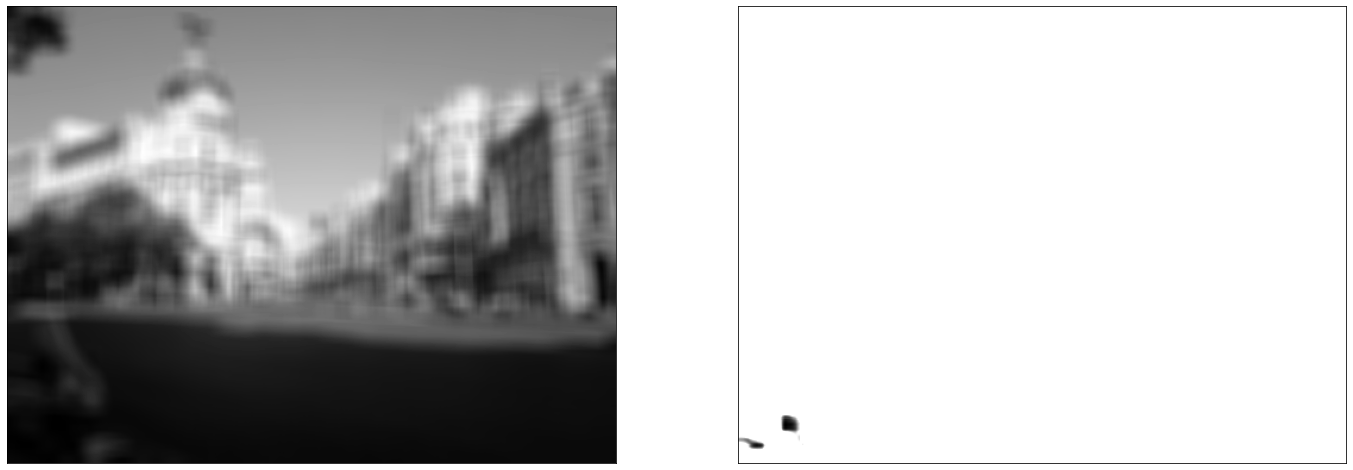

In [ ]:
dst1 = cv2.blur(gimg, (15,15))
dst2 = cv2.boxFilter(gimg, -1, (15,15), normalize=False)
print('両者の差分=', (dst1-dst2).sum())
plt.subplot(1,2,1)
plt.imshow(dst1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dst2, cmap='gray') #正規化していないので飽和してしまう

## 加重平均化フィルタ

OpenCVではgaussianBlurとして実装されている。引数はカーネルサイズと$\sigma$。注目画素の重みが強いので平均化フィルタよりも自然な平滑化になる。

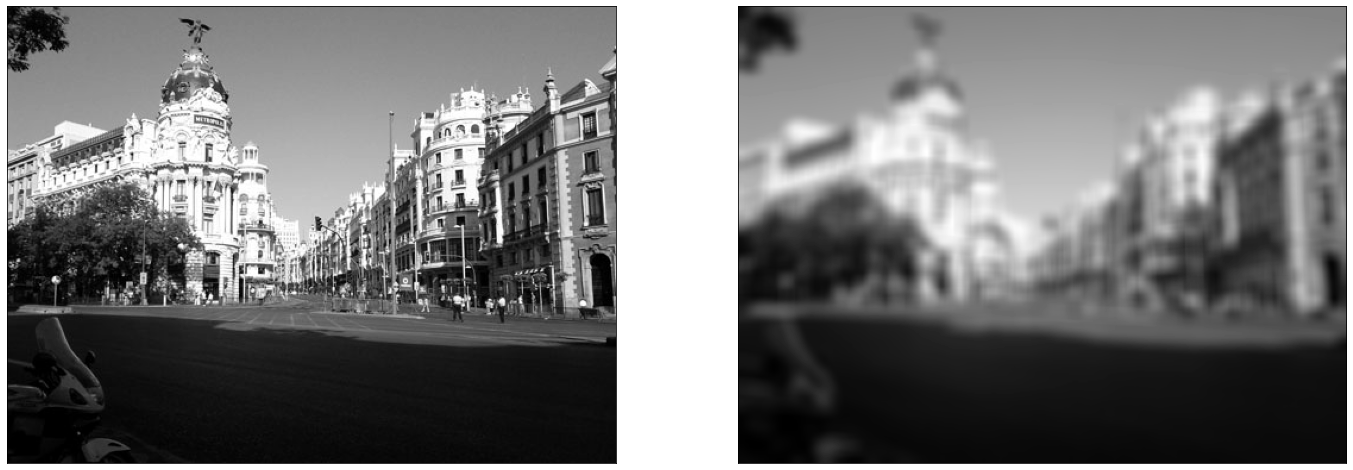

In [ ]:
gimg = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.GaussianBlur(gimg, (15, 15), 6)

plt.subplot(1,2,1)
plt.imshow(gimg, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')

## 特定方向の平滑化

任意の方向へのブレを再現する。MATLABだとまんまmotionのブラーのカーネルを出力できるのだが，OpenCVにはないので，numpyで単位行列を生成して(これが45度のモーションのカーネルになる)，回転させたいのだが回転もアフィン行列を生成しないといけないので，PILのお手軽rotateを使う (回転方向はCCW(反時計周り))

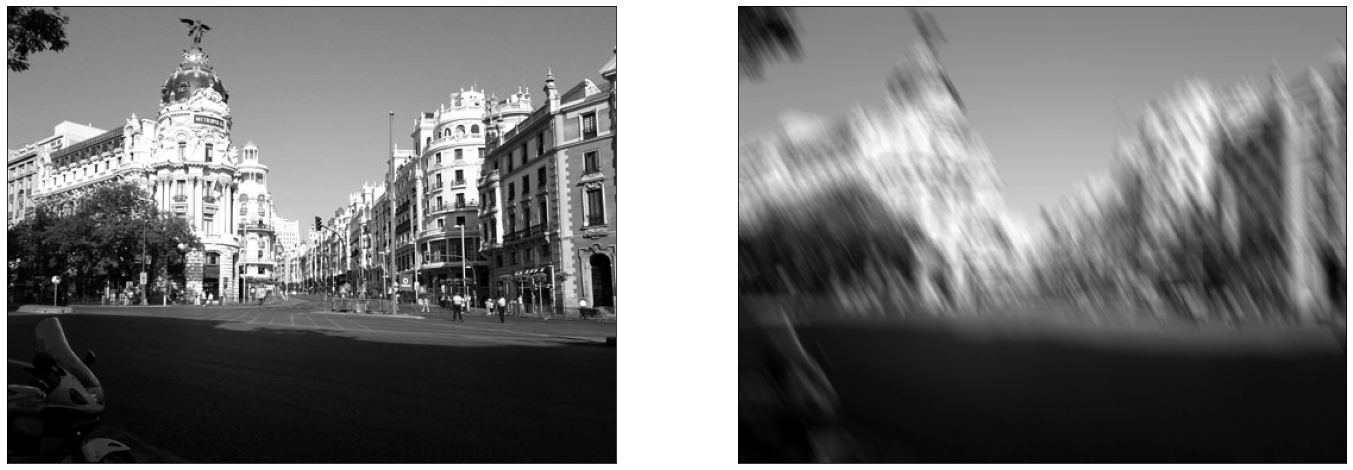

In [ ]:
from PIL import Image
size = 25
kern = Image.fromarray(np.identity(size)/size) #この時点で時計周りに45度
kern = kern.rotate(-15,Image.BILINEAR) #PILは任意角度の回転が楽
kern = np.array(kern) #numpyのndarrayに戻す
dst = cv2.filter2D(gimg, -1, kern) 
plt.subplot(1,2,1)
plt.imshow(gimg, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')

## 微分フィルタ

結果が±の範囲になるので浮動小数点型に変換し，imshowの際に表示範囲を操作する

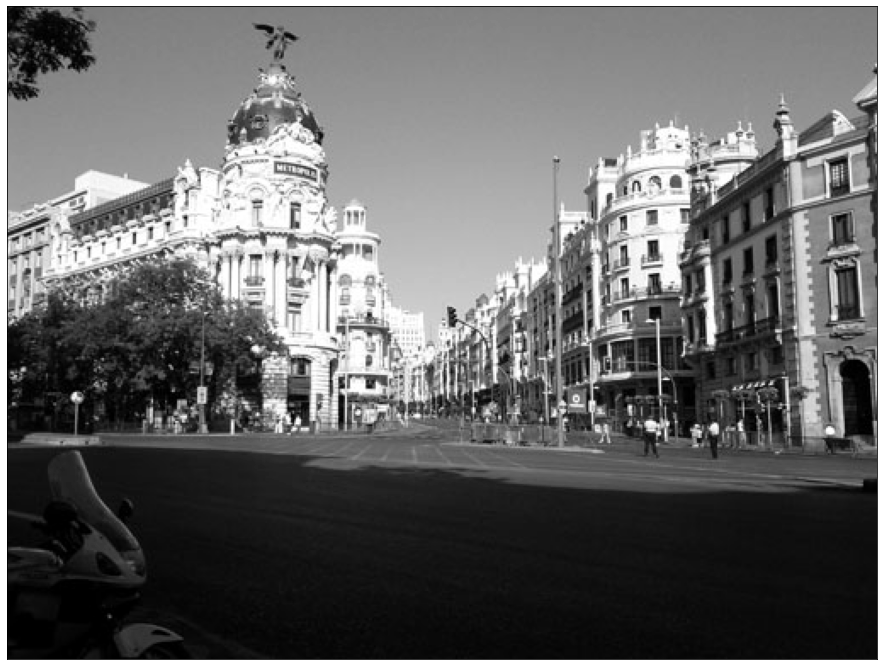

In [ ]:
gimg = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)/255.
plt.rc('xtick', bottom=False, labelbottom=False)
plt.rc('ytick', left = False, labelleft = False)
plt.imshow(gimg, cmap='gray', vmin=0, vmax=1)

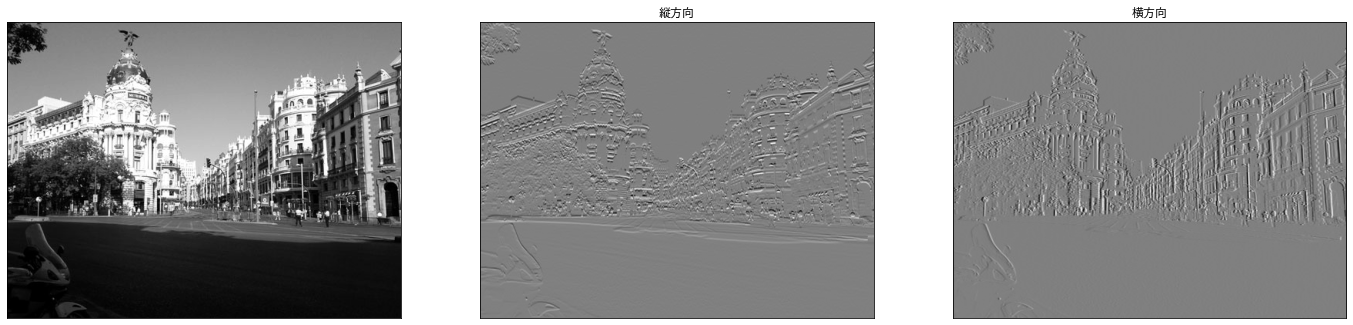

In [ ]:
hy = np.array([[0, 0.5, 0],[0, 0, 0],[0, -0.5, 0]])
hx = hy.T
dst_y = cv2.filter2D(gimg, -1, hy)
dst_x = cv2.filter2D(gimg, -1, hx)
plt.subplot(1,3,1)
plt.imshow(gimg, cmap='gray', vmin=0, vmax=1)
plt.subplot(1,3,2)
plt.imshow(dst_y, cmap='gray', vmin=-0.5, vmax=0.5)
plt.title('縦方向')
plt.subplot(1,3,3)
plt.imshow(dst_x, cmap='gray', vmin=-0.5, vmax=0.5)
plt.title('横方向');

## 濃淡情報を用いたsurfaceプロット

濃淡の変化が大きい→勾配がキツい

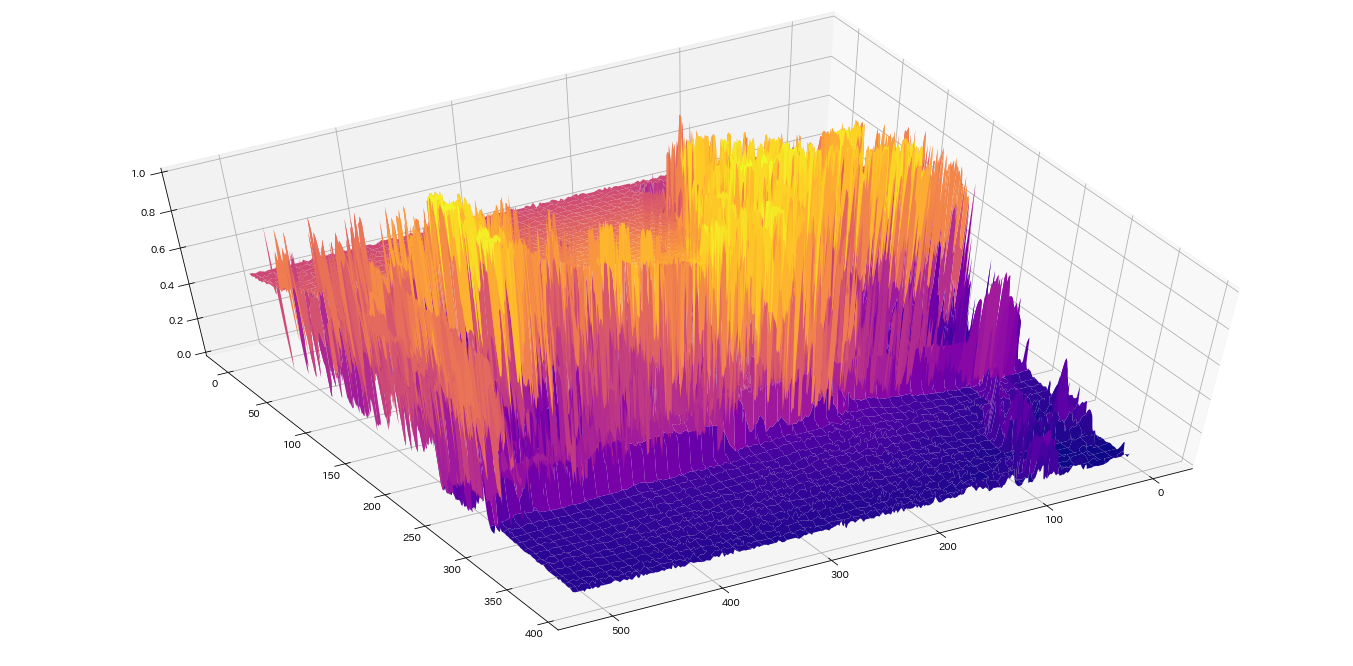

In [ ]:
from mpl_toolkits.mplot3d import axes3d
plt.rc('xtick', bottom=True, labelbottom=True)
plt.rc('ytick', left = True, labelleft = True)
x = np.linspace(0, gimg.shape[1], num=gimg.shape[1])
y = np.linspace(0, gimg.shape[0], num=gimg.shape[0])
X, Y = np.meshgrid(x,y)
ax3d = plt.axes(projection = '3d')
ax3d.view_init(elev=60, azim=60)
ax3d.plot_surface(X, Y, gimg, cmap='plasma')

## 微分フィルタの結果のsurface表示



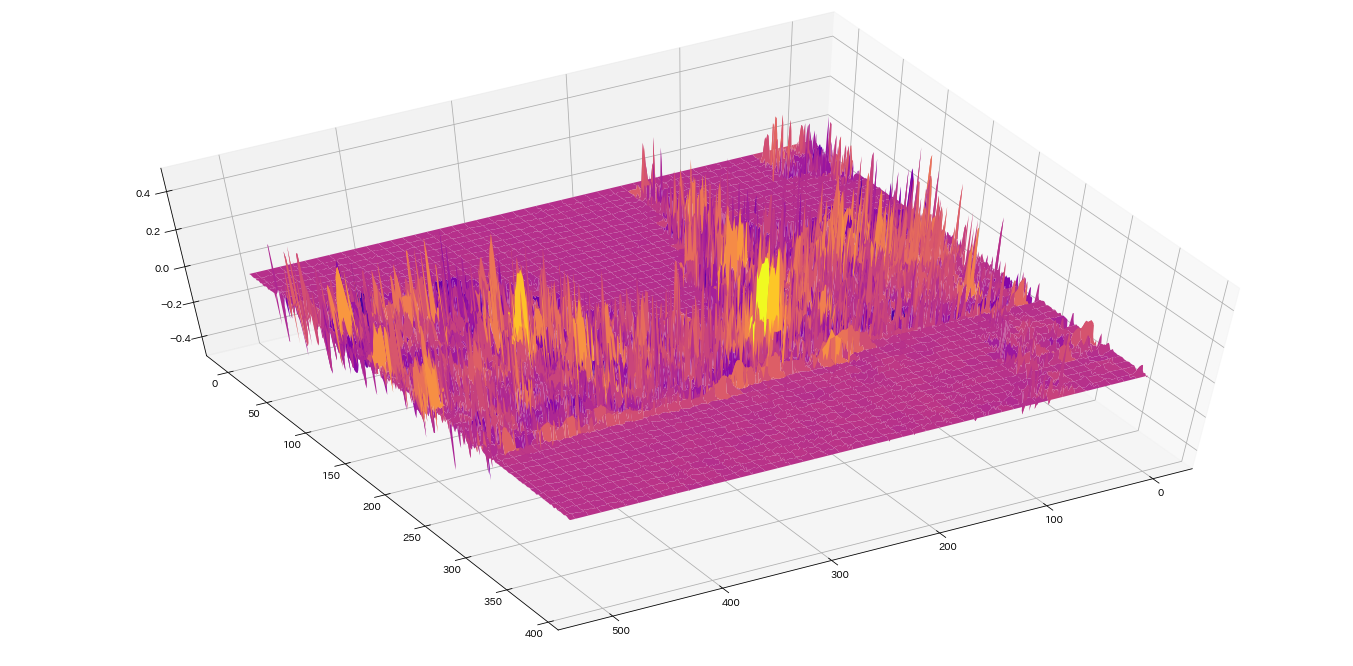

In [ ]:
ax3d = plt.axes(projection = '3d')
ax3d.view_init(elev=60, azim=60)
ax3d.plot_surface(X, Y, dst_y, cmap='plasma')

## Prewittフィルタ

OpenCVには実装されていないのでフィルタは手作りでfilter2D。縦横は転置するだけ。
微分の(-1, 0, 1)のフィルタに平滑化の(1, 1, 1)'なフィルタを掛けたもので，微分フィルタを3x3にしたものという訳ではない。平滑化が入っている点が唯の微分とは異なる。 ※順次フィルタ処理を掛けるのと，フィルタにフィルタ処理を施した結果でのフィルタ処理(ややこしい)は同じ結果になる特性を利用したもの

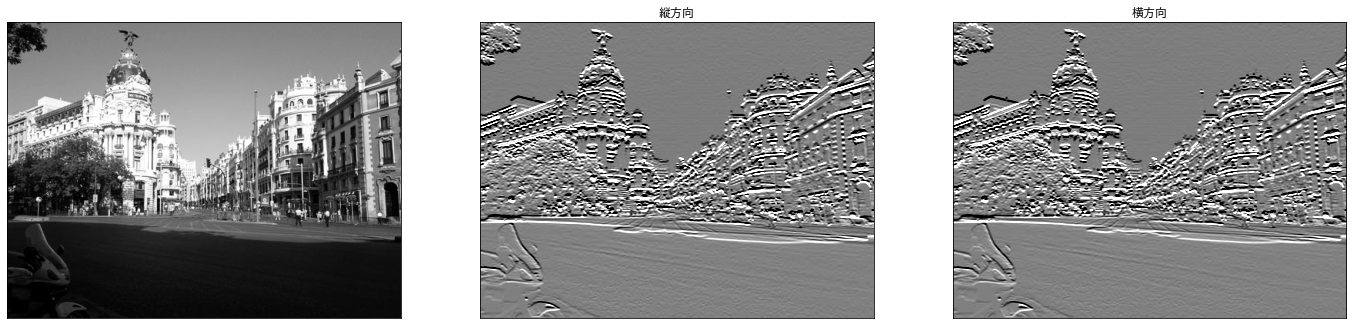

In [ ]:
plt.rc('xtick', bottom=False, labelbottom=False)
plt.rc('ytick', left = False, labelleft = False)
kern = np.array([[1, 1, 1],[0, 0, 0], [-1, -1, -1]])
dst_y = cv2.filter2D(gimg, -1, kern)
plt.subplot(1,3,1)
plt.imshow(gimg, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(dst_y, cmap='gray', vmin=-0.5, vmax=0.5)
plt.title('縦方向')
kern = kern
dst_x = cv2.filter2D(gimg, -1, kern)
plt.subplot(1,3,3)
plt.imshow(dst_x, cmap='gray', vmin=-0.5, vmax=0.5)
plt.title('横方向');

絶対値

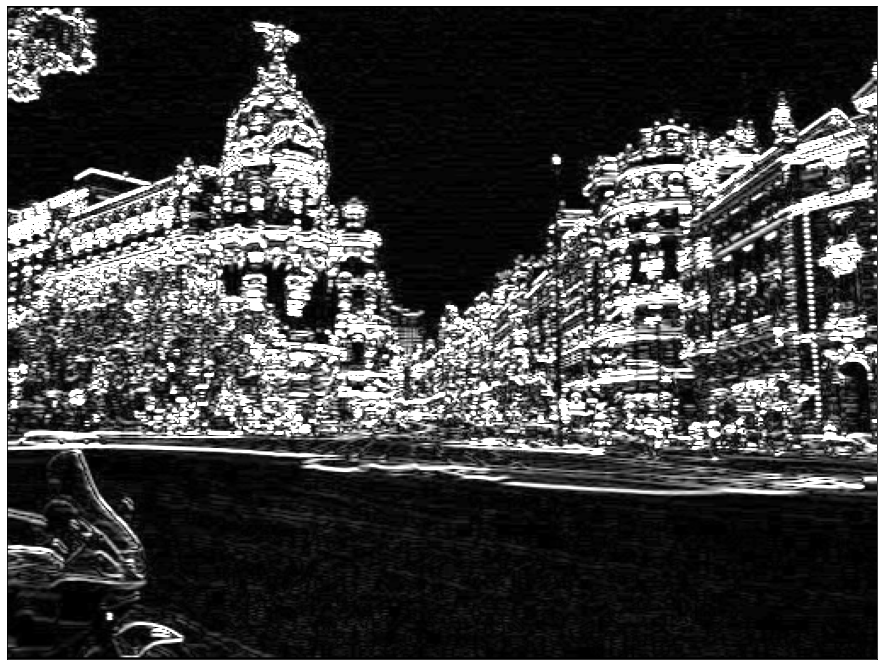

In [ ]:
mag = np.abs(dst_x)+np.abs(dst_y)
plt.imshow(mag, cmap='gray', vmin=0, vmax=1)

## Sobelフィルタ

Sobelとして実装されている。
ガウシアンフィルタを畳み込んでいるのでノイズにやや強い。

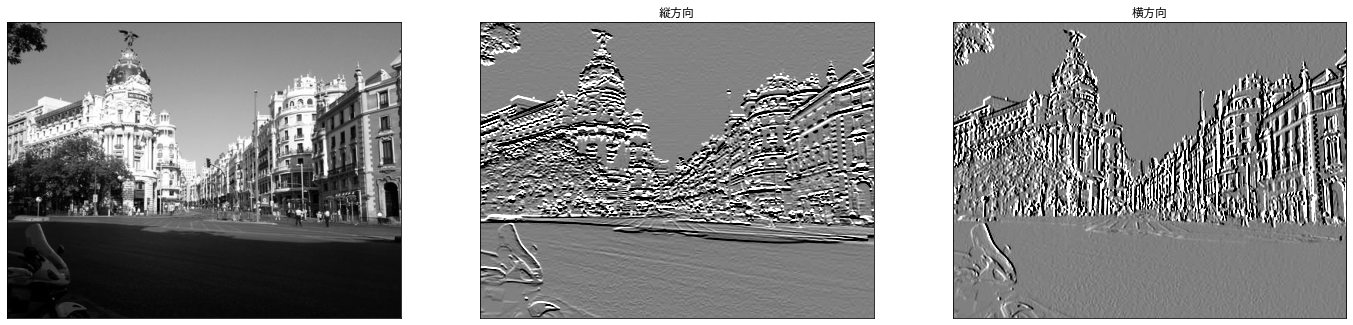

In [ ]:
dst_y = cv2.Sobel(gimg, -1, 0, 1, ksize=3)
plt.subplot(1,3,1)
plt.imshow(gimg, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(dst_y, cmap='gray', vmin=-0.5, vmax=0.5)
plt.title('縦方向')
dst_x = cv2.Sobel(gimg, -1, 1, 0, ksize=3)
plt.subplot(1,3,3)
plt.imshow(dst_x, cmap='gray', vmin=-0.5, vmax=0.5)
plt.title('横方向');

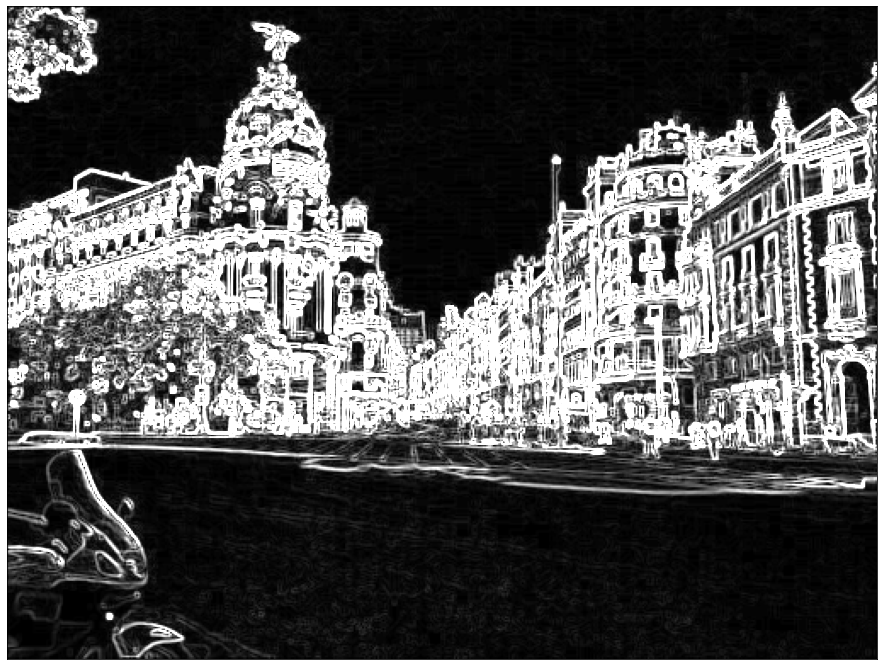

In [ ]:
mag = np.abs(dst_x)+np.abs(dst_y)
plt.imshow(mag, cmap='gray', vmin=0, vmax=1)

安直に1.0より大きい場合だけ表示させる

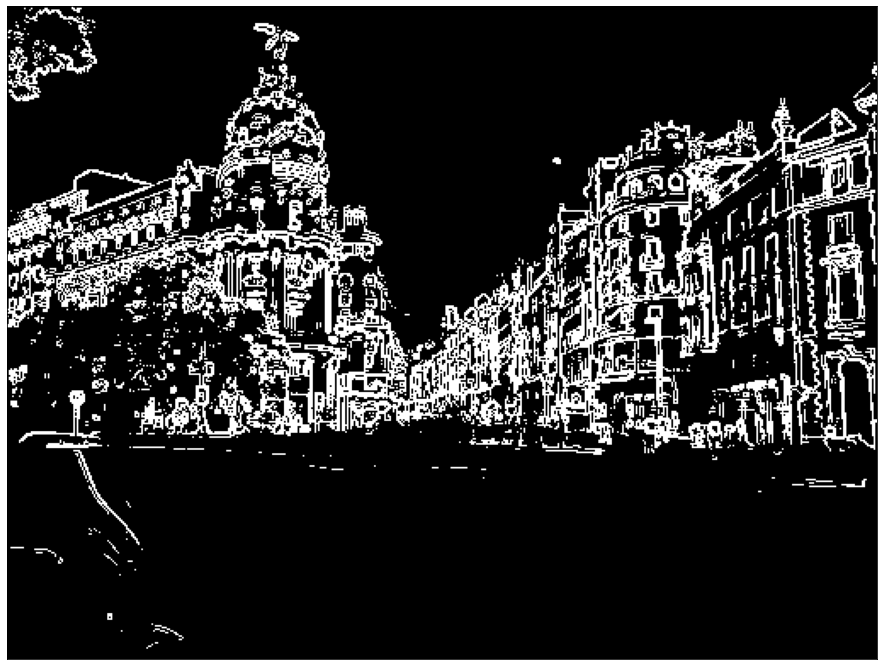

In [ ]:
plt.imshow(mag>1.0, cmap='gray', vmin=0, vmax=1)

## S&Pノイズの付与とsobel
[ここ](https://stackoverflow.com/questions/14435632/impulse-gaussian-and-salt-and-pepper-noise-with-opencv)が元ネタ。Pythonで書き直す。画像と同一サイズの行列を生成して0から1の乱数をバラまき，白黒それぞれで閾値を用意してそれを越えたら値をsetする。

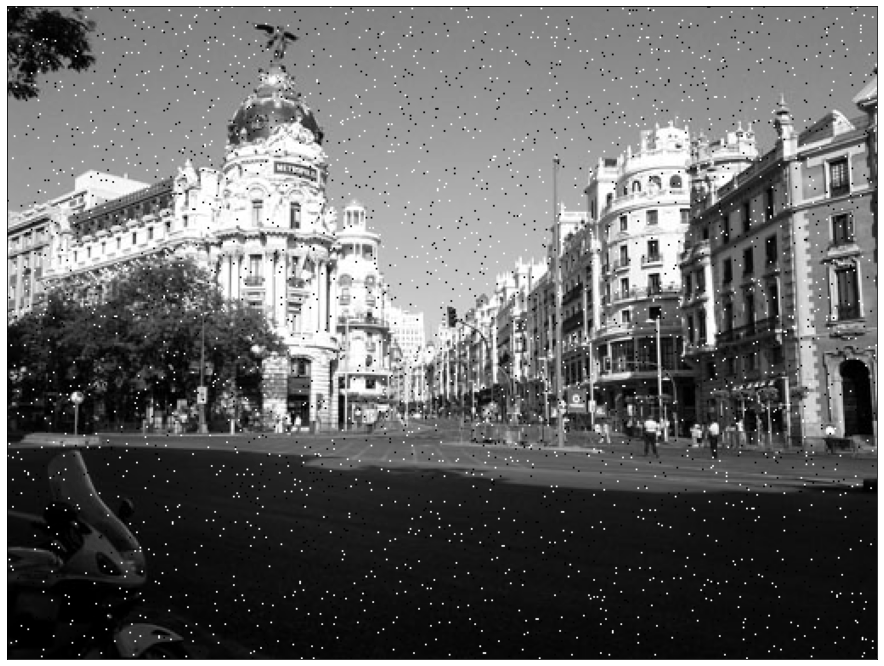

In [ ]:
sp_noise = np.random.rand(gimg.shape[0], gimg.shape[1])
pepper = sp_noise < 0.01
salt = sp_noise > 0.99
sp_image = gimg.copy()
sp_image[pepper] = 0
sp_image[salt] = 1.0
plt.imshow(sp_image, cmap='gray')

再びSobelを施してみる

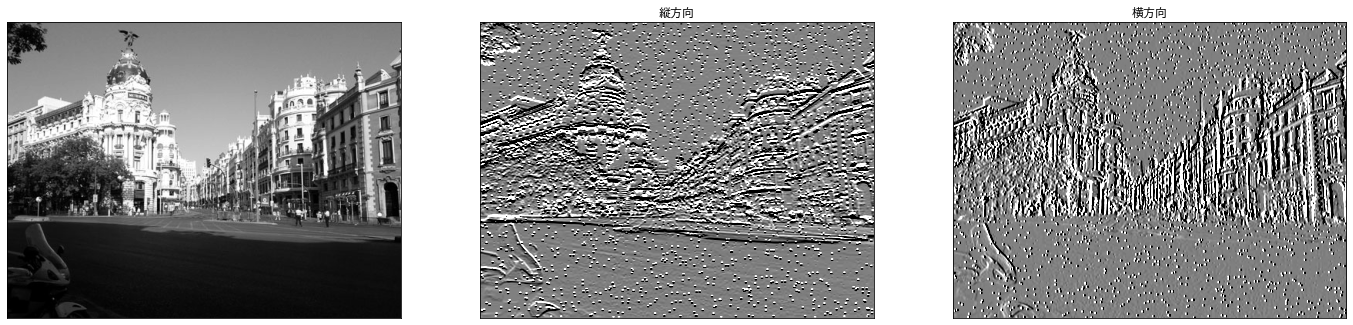

In [ ]:
dst_y = cv2.Sobel(sp_image, -1, 0, 1, ksize=3)
plt.subplot(1,3,1)
plt.imshow(gimg, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(dst_y, cmap='gray', vmin=-0.5, vmax=0.5)
plt.title('縦方向')
dst_x = cv2.Sobel(sp_image, -1, 1, 0, ksize=3)
plt.subplot(1,3,3)
plt.imshow(dst_x, cmap='gray', vmin=-0.5, vmax=0.5)
plt.title('横方向');

閾値処理をするまでもなくノイズだらけなのがわかる。特にSolt&Pepperのように濃淡変化が激しいノイズは微分フィルタが悉く応答してしまうので弱い。

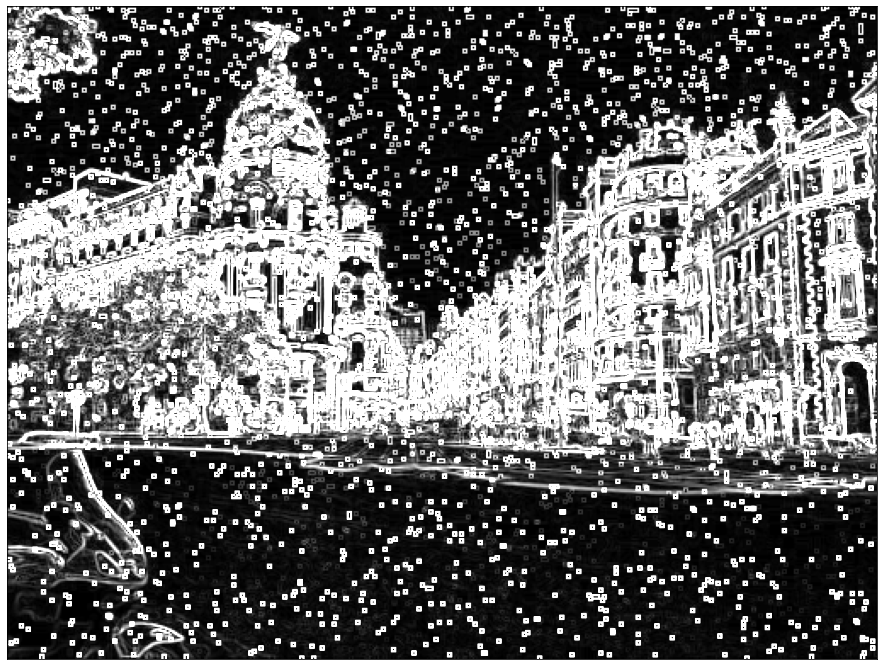

In [ ]:
mag = np.abs(dst_x)+np.abs(dst_y)
plt.imshow(mag, cmap='gray', vmin=0, vmax=1)